# Covid19 project analysis - Baptiste Roberjot

In [191]:
import pandas
import matplotlib.pyplot as plt

db = pandas.read_csv('C:/Users/bapti/Documents/A2_semestre2/python_projects/Covid19-AI-school-project/latestdata/latestdata.csv',  dtype='unicode', low_memory=False)

To run the code of the Notebook, you must run all the files in annex first.

## 1. Analysis of the dataset

In this section we will in a first time clean our data, and plot some representations to understand our data. I'm working on 'outcome', 'age', 'sex', 'country', 'chronic_disease_binary', 'lives in Wuhan', 'travel in Wuhan'.  
We will then try to find out the correlation of these different columns with the outcome.

#### Outcome filtering & cleaning

To clean the outcome, we replace string by variable either "infected", "dead" or "discharged".  
We can see that there is a huge majority of entries just labeled as "infected".  
There are just a few entries labeled as "dead" or "discharged".

Infected :  919603
Cured :  858
Dead :  268


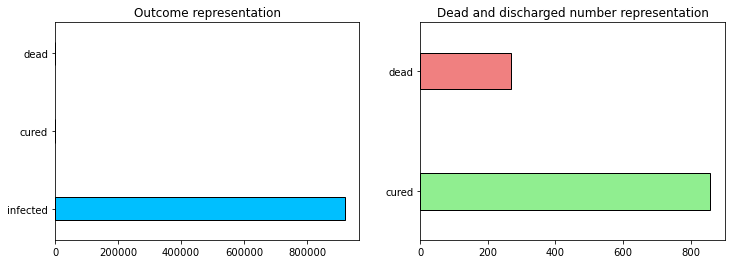

In [192]:
db = pandas.read_csv('C:/Users/bapti/Documents/A2_semestre2/python_projects/Covid19-AI-school-project/latestdata/latestdata.csv',  dtype='unicode', low_memory=False)

cleanOutcome(db) #replace string variable by either : infected = 0, dead = 1, discharged = 2
plotOutcomeInfo() #annex part : plot data


#### Age column filtering & cleaning

Values that contained range (e.g. 40-49) are replaced by the mean of the range.  
All values are changed to float.    
NaN values are either ignored or changed to mean (graph example below).    

We can see that the mean age of the dead people (67 years) is higher than the mean age of the infected (50 years). And that the mean age of the discharger people is only 41 years old.  
It seems that the age is an important variable influencing the outcome.  
The higher the age, the higher the risk of death. The younger the person, the more likely they are to be safe.  

The issue with replacing the NaN values with the mean is that the data can be corrupted, but if wwe don't do so, we will have a lot of data missing and a lot of coluns to drop for the PCA for instance.  

The two last scatter plot clearly shows the correlation of the age with the risk of dying from the virus. We can see that the great majority of dead people died above the age of 40 years old, while 

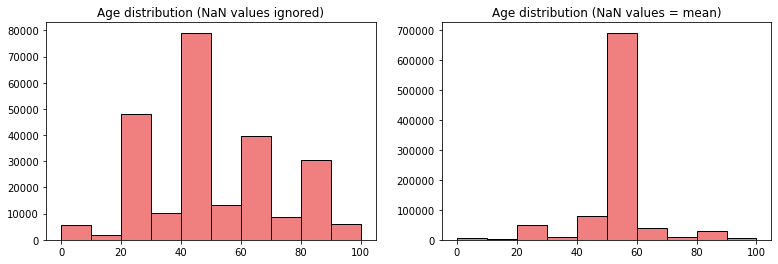

Mean death age :  67.32977987797429  years
Mean cured age :  41.95359216816043  years
Mean infected age :  50.998266029408676  years


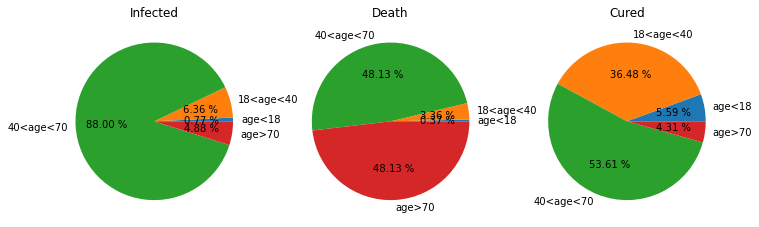

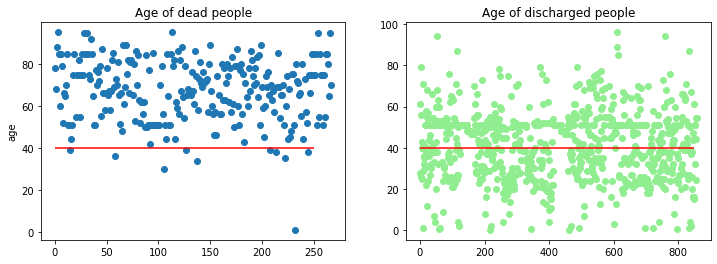

In [193]:
#===============================AGE FILTER===============================
# - replace range (e.g. 40-49) by the mean of the range
# - replace NaN values by mean age or not
# - drop 'months' 'month' '+' to get float numbers

ageNormalize(db)#see method in Annex

db['age'] = db['age'].apply(pandas.to_numeric, errors = 'coerce') #data to float
filterOutlier(db, replaceBy=db['age'].mean() ,column='age') #replace outliers by the mean value

plotAgeInfo()

#### Sex column

Sex column is already correctly labeled.  
We can see that a majority of the dead people registered in the database are men, but a majority of cured people are also men.  There are 576 men that we know the outcome in the database against 340 women.  
With relative percentage of the number of death for each genre regarding the number of entries, the result is in fact quite similar :   
men die 28.8% of the time  
women die 24.4% of the time  
We can explain the little difference by a biasis created by the difference of number of entries that we know the outcome.  
  
For now, we cannot conclude on a correlation or not of the percentage of death and the genre.

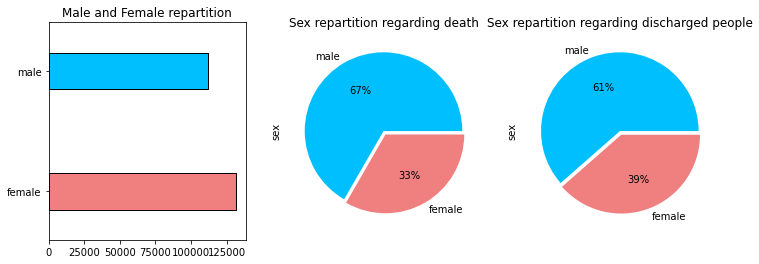

Number of known men outcome :  576
Number of known women outcome :  340
Relative percentage of men death :  28.819444444444443  %
Relative percentage of women death :  24.41176470588235  %


In [194]:
plotSexInfo() #function in plot annex
labelSexWithValues(db) #replace male and female by 0 and 1

#### Country and zone of origin

We are replacing all country names by distinct values in order to let the data be usable in the PCA.  
We can see that Phillipines, China, United States and India are the country with the larger quantity of death. China and India also have a great number of discharged people.
The country is correlated with the outcome.

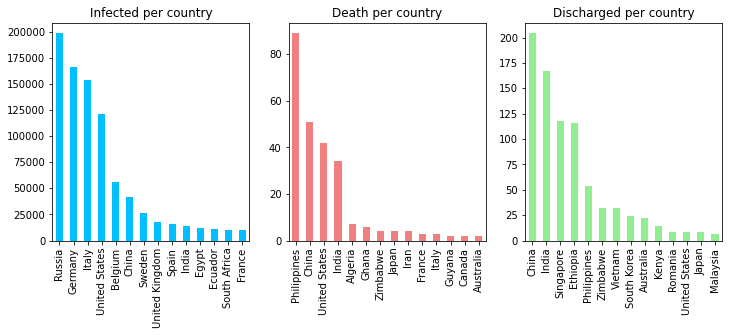

In [195]:
plotCountryInfo()
labels = findElements(db['country'])
replaceCountryNamesByNumbers() #Changing country names by numbers

#### Chronic disease

Looking at people with chronic illnesses for which the outcome is known, 69.7% of them died and 30.2% has been discharged.  
We can assume that chronic diseases increase a coronavirus patient's risk of death.

Percentage of people with chronic disease that died :  69.73684210526316  %
Percentage of people with chronic disease that survived :  30.263157894736842  %


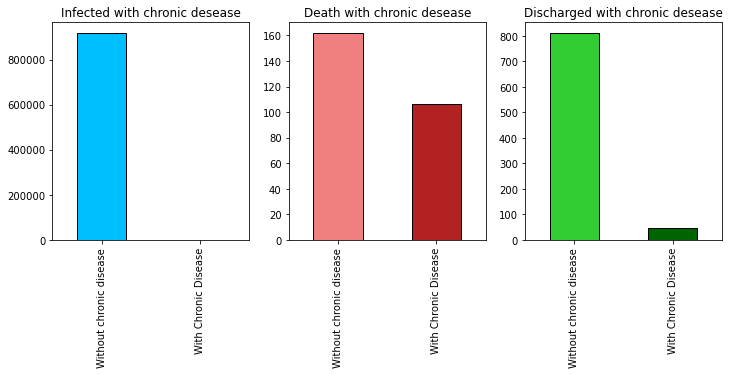

In [196]:
plotChronicDiseaseInfo()
replaceChronicDiseaseBinary() #replace True or False by 0 and 1

The function below also clean the columns 'lives_in_Wuhan' and 'travel_history_binary'

In [197]:
#lives in Wuhan
cleanLivesInWuhan(db)
#travel to Wuhan
replaceTravelToWuhan()

#### Scatter the data

Data representation, considering age, sex and country of origin.

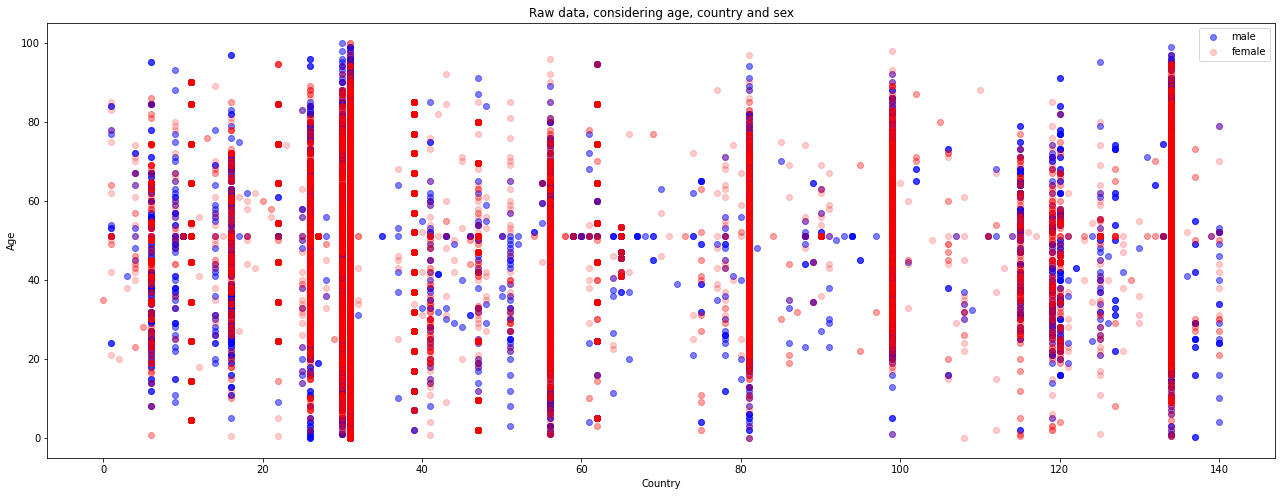

In [198]:
dbScatter = db.copy()
plt.figure(figsize=(22, 8))
#dbScatter = dbScatter[dbScatter.outcome != 0]
dbF = dbScatter.copy()[dbScatter.sex == 0]
dbM = dbScatter.copy()[dbScatter.sex == 1]
plt.scatter( dbF['country'], dbF['age'], color = 'blue', alpha=0.5)
plt.scatter( dbM['country'], dbM['age'], color = 'red', alpha=0.2)
plt.xlabel('Country')
plt.legend(['male', 'female'])
ax.set_xticklabels(['lables'])
plt.title('Raw data, considering age, country and sex')
plt.ylabel('Age')
plt.show()

#### Correlation computation

Results of a correlation computation isn't relevant if it is done on all the dataset.  
I've decided to compute the correlation between the columns we cleaned and the outcome only containing 'dead' and 'discharged' values. (dead = 1, discharged = 2)  
We can see below a good inverse correlation between the outcome and the age (-0.565), and between the outcome and the presence of chronic disease (-0.426). The correlation is negative because the higher the age is, and the lower the result of the outcome will be (since dead = 1 and discharged = 2).  

We observe also an inverse correlation of the outcome with lives_in_Wuhan, which means that living in Wuhan is a parameter that can lead to death. (-0.46)

In [199]:
dfTest = db.copy()
dfTest = dfTest[dfTest.outcome != 0]
print(dfTest.corr()['outcome'])

age                      -0.565229
sex                      -0.047863
country                  -0.106020
lives_in_Wuhan           -0.462522
chronic_disease_binary   -0.426109
outcome                   1.000000
travel_history_binary     0.146765
Name: outcome, dtype: float64


### PCA Analysis

I chose to use the columns 'sex', 'age', 'country' and 'chronic_disease_binary' to seak principal components determining the 'outcome'.  
The bar plot shows us that there is two major components.  

We can see a cluster of dead people that is rather in the upper area of the graph. This is the age direction.  
Each "straight lines" correspond to a country. We can see that the data of 'dead' and 'discharged' people can be described by two principal components that are the country of origin and the age.

         PC1        PC2       PC3       PC4  outcome
0  12.524547  30.564399 -0.372049 -0.368592      1.0
1 -41.185587  12.670562  0.630701 -0.205750      2.0
2 -40.636726 -20.325987 -0.330480 -0.154384      2.0
3 -41.102467   7.671338  0.635102 -0.176835      2.0
4 -41.484821  30.667766  0.614859 -0.309844      2.0


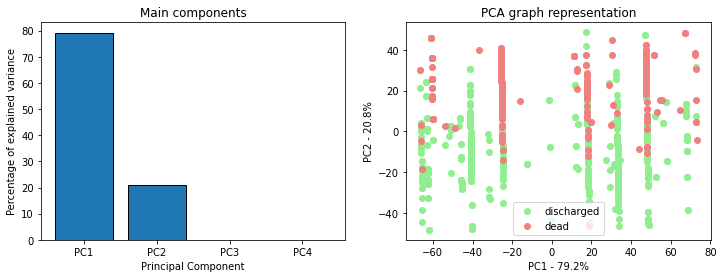

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
considerInfected = False

#get columns and reset index
features = ['sex', 'age', 'country', 'chronic_disease_binary']
df = pandas.DataFrame(db[['outcome','sex', 'age', 'country', 'chronic_disease_binary']].copy().dropna())

if not considerInfected:
    df = df[df.outcome != 0]
df = df.reset_index()

x = df.loc[:, features].values
y = df.loc[:, ['outcome']].values


#Standardization
StandardScaler().fit_transform(x)

#PCA
pca = PCA()
pComponents = pca.fit_transform(x)

principalDF = pandas.DataFrame(data=pComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

finalDF = pandas.concat([principalDF, df[['outcome']]], axis = 1)


#plot bar principal components
nb_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1) #nb of components
labels = ['PC' + str(x) for x in range(1, len(nb_var) + 1)] #labels for each component

fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(1,2,1) 

plt.bar(x=range(1, len(nb_var)+1), height=nb_var, tick_label=labels, edgecolor='black')
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Main components')

#pca_df = pandas.DataFrame(finalDF, columns=labels)
print(finalDF.head())

targets = [2, 1]
legends = ['discharged', 'dead', 'infected', ]
colors = [ 'lightgreen', 'lightcoral','deepskyblue']

ax = fig.add_subplot(1, 2, 2)

for target, color in zip(targets, colors):
    currentPoints = finalDF['outcome'] == target
    ax.scatter(finalDF.loc[currentPoints, 'PC1'], finalDF.loc[currentPoints, 'PC2'],
              color = color)
    
"""
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
for i in range(n):
    ax.arrow(0, 0, coeff[i,0], coeff[i,1], color='black', head_width = 0.1, head_length = 0.08)
    ax.text((coeff[i,0])*1.15, (coeff[i,1]) *1.15, features[i], fontsize='10')
"""
plt.legend(legends)
plt.xlabel('PC1 - {0}%'.format(nb_var[0]))
plt.ylabel('PC2 - {0}%'.format(nb_var[1]))
plt.title('PCA graph representation')
    
plt.show()


## 2. Bayes Nets

A. What is the probability for a person to have symptoms of COVID-19
(symptom_onset=date) if this person visited Wuhan (visiting Wuhan = 1) ? Consider
that (symptom_onset=N/A) means that the patient is asymptomatic.

In [201]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
#bayes definition in annex

#if travelled in wuhan, replace by 1
visitedWuhan = binariseSeries(db.travel_history_location,0).fillna(0)

symptomOnset = binariseSeries(db.date_onset_symptoms,1).fillna(0)

X = visitedWuhan.values.reshape(-1, 1)
y = symptomOnset

y_pred = bayesPrediction(X, y, [1], 'proba')

print("Probability to have symptoms if visited Wuhan : ", np.round(y_pred[0][1] * 100, decimals = 2), '%')

Probability to have symptoms if visited Wuhan :  51.71 %


B. What is the probability for a person to be a true patient if this person have symptoms of
COVID-19 (symptom_onset=date) and this person visited Wuhan ?

In [202]:
truePatient = binariseSeries(db.date_admission_hospital, 1).fillna(0)

visitedWuhan_symptomatic = pandas.concat([visitedWuhan, symptomOnset], axis = 1)

X = visitedWuhan_symptomatic
y = truePatient

y_pred = bayesPrediction(X, y, [1,1], 'proba')
print("Probability to be a true patient if symptomatic : ", np.round(y_pred[0][1] * 100, decimals = 2), '%')

Probability to be a true patient if symptomatic :  91.59 %


C. What is the probability for a person to death if this person visited Wuhan ?

In [203]:
X = visitedWuhan.values.reshape(-1, 1)
y = db.outcome

y_pred = bayesPrediction(X, y, [1], 'proba')
print("Probability to die if visited Wuhan : ", np.round(y_pred[0][1] * 100, decimals = 2), '%')

Probability to die if visited Wuhan :  0.74 %


D. Estimate the average recovery interval for a patient if this person visited Wuhan ? 

In [204]:
outcomeDB = pandas.concat([db[['date_death_or_discharge','date_onset_symptoms','outcome']], visitedWuhan], axis = 1).dropna()
outcomeDB = outcomeDB[outcomeDB.outcome == 2] #keep all discharged cases

#Conversion to datetime
outcomeDB['date_death_or_discharge'] = pandas.to_datetime(outcomeDB['date_death_or_discharge'], format='%d.%m.%Y')
outcomeDB['date_onset_symptoms'] = pandas.to_datetime(outcomeDB['date_onset_symptoms'], format='%d.%m.%Y')
recoveryInterval = ((outcomeDB['date_death_or_discharge'] - outcomeDB['date_onset_symptoms']).dt.days).dropna()

X = outcomeDB.travel_history_location.values.reshape(-1, 1)
y = recoveryInterval

y_pred = bayesPrediction(X, y, [1], 'predict')
print("Average recovery interval if visited wuhan : ", np.round(y_pred[0], decimals = 2), 'days')

Average recovery interval if visited wuhan :  26 days


## 3. Machine Learning

#### A. KNN

When considering the columns : sex, age, country and chronic disease, we have an approximate acccuracy (over 3000 tests) of 86 %, the aim is to predict wether if the patient will die or will be discharged.

When adding a new column in the parameters, 'lives_in_Wuhan', the accuracy jumps up to 93,7%, approximately more than 7% more precise ! A way to enhance our accuracy is to consider all parameters that can have an influence on the outcome.

We can also try to make variation in the quantity of training and testing data to enhance the accuracy.

A great way to enhance our accuracy would be to have a larger amount of data.  

Making variation on the K used can make differences in the obtained accuracy. With a k = 2, we have approximately 86% of accuracy, while with a k = 5 we have an accuracy of 94%.

In [205]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

considerInfected = False
#get columns and reset index
features = ['sex', 'age', 'country', 'chronic_disease_binary', 'lives_in_Wuhan', 'travel_history_binary']
df = pandas.DataFrame(db[['outcome', 'sex','age', 'country', 'chronic_disease_binary', 'lives_in_Wuhan', 'travel_history_binary']].copy().dropna())

if not considerInfected:
    df = df[df.outcome != 0]
df = df.reset_index()

x = df.loc[:, features].values
y = df.loc[:, ['outcome']].values

clf = neighbors.KNeighborsClassifier(5)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
#clf.fit(X_train, y_train)
res = []

for i in range (3000) :
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    res.append(accuracy)
print('Accuracy : ', sum(res)/len(res)) 


result = ['', 'dead', 'discharged']
#Example of prediction
example_measures = np.array([1, 70, 26, 1, 1, 1])
example_measures = example_measures.reshape(1, -1)
prediction = clf.predict(example_measures)
print(prediction)
print('This patient is predicted as',result[int(prediction)])


Accuracy :  0.9363333333333571
[2.]
This patient is predicted as discharged


#### B. Linear Regression

The only value correlated with the age is the outcome, we try to predict the age based on the outcome. With a linear regression model, we can predict the age with a root mean squared error of 10.77, which is not really precise, but we can understand this result since we are trying to find out an age only based on one criteria.  

It would be interesting to perform a multiple regression based on variables more correlated with the age.

[51.00120093]
[[-3.02234588]]
Root Mean Squared Eror :  10.776165448893035


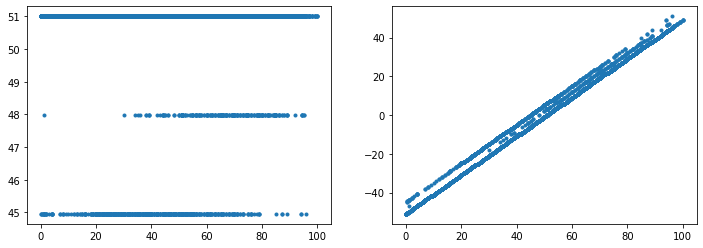

In [206]:
from sklearn.linear_model import LinearRegression

#get columns and reset index
features = [ 'age', 'country', 'chronic_disease_binary']
df = pandas.DataFrame(db[['outcome', 'age', 'country', 'chronic_disease_binary']].copy().dropna()).reset_index()

modeleReg=LinearRegression()

y = df['age'].values
X = df['outcome'].values
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)
modeleReg.fit(X, y)

#intersideral
print(modeleReg.intercept_)
print(modeleReg.coef_)

#calcul du R²
modeleReg.score(X,y)

RMSE=np.sqrt(((y-modeleReg.predict(X))**2).sum()/len(y))
print('Root Mean Squared Eror : ', RMSE)

plt.figure(figsize =(12, 4))
plt.subplot(1, 2, 1)
plt.plot(y, modeleReg.predict(X),'.')
plt.subplot(1, 2, 2)
plt.plot(y, y-modeleReg.predict(X),'.')
plt.show()

#### C. K-Means

In this part we try to apply K-Means to our previous PCA result. In a first time we use the silhouette technique to determine the optimal number of clusters. Unfortunately, I have processed data in such a way that the two main clusters don't make a lot of sense. I decided to try the clustering with 4 clusters, and if we join the two clusters of the upper part and the two clusters of the lower part, we obtain an upper cluster that contains the majority of death (separated by the red line).  
The issue is that this upper cluster also contains a lot of discharged people.  

I think that with the way I processed the data and with this clustering method, we cannot have something really precise.

Silhouette metrics determine that the optimal number of cluster is :  2


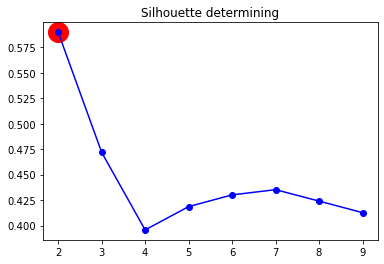

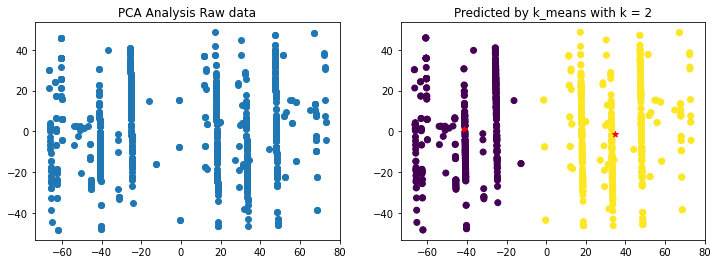

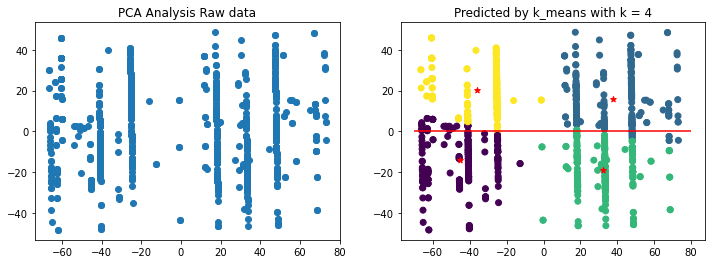

In [207]:
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn import metrics

#using finalDF from the PCA
x = [finalDF['PC1']]
y = [finalDF['PC2']]
#x = df['country']
#y = df['age']
test = pandas.DataFrame()
test['C1'] = x
test['C2'] = y

cl_finalDF = finalDF.loc[:,['PC1', 'PC2']].values
#cl_finalDF = test.to_numpy()

##############Silhouette score
# https://www.youtube.com/watch?v=Qh7VxLsaU9M
#print("Silhouette : ", metrics.silhouette_score(cl_finalDF, kmeans.labels_,metric='euclidean'))

kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(cl_finalDF) for k in range( 1, 10)]

silhouette_scores = [metrics.silhouette_score(cl_finalDF, kmeans.labels_) for kmeans in kmeans_per_k[1:]]

k = np.argmax(silhouette_scores) + 2
print("Silhouette metrics determine that the optimal number of cluster is : ", k)

plt.figure()
plt.title('Silhouette determining')
plt.plot(range(2, 10), silhouette_scores, "bo-", color="blue" )
plt.scatter(k, silhouette_scores[k-2], c='red', s= 400)
plt.show()
##############Silhouette score

plotKMeans(2, False)
plotKMeans(4, True)


# Annex

### Functions to clean data

In [5]:
#--------------------------------AGE---------------------------------
#return each unique item of a column
def findElements(column):
    elements = column.astype('category').cat.categories
    return elements

def ageNormalize(dataset, columnName = 'age'):
    elements = findElements(dataset[columnName])
    splitElement = ['-', ' month', ' months', ' weeks', '+']
    for element in elements:
        if type(element) == str :
            for separation in splitElement :
                if separation in element:
                    splitElem = element.split(separation)
                    splitElem = list(filter(None, element.split(separation)))
                    if len(splitElem) == 2 and splitElem[1] != 's':
                        mean = (float(splitElem[0])+float(splitElem[1]))/2.0
                        newData = dataset[columnName].replace(to_replace = element,value = mean, inplace= True)
                    elif len(splitElem) == 2 and splitElem[1] == 's':
                        newData = dataset[columnName].replace(to_replace = element,value = float(splitElem[0]),inplace= True)
                    elif len(splitElem) == 1:
                        newData = dataset[columnName].replace(to_replace = element,value = float(splitElem[0]), inplace= True)
                    else:
                        raise Exception("An error occured")

def filterOutlier(dataset, replaceBy=0, column='age'):
    for element in dataset[column]:
        if element > 100:
            newElement = dataset[column].replace(to_replace = element, value=replaceBy, inplace=True)
            #print("WOW : ", element)

def clusterAges(dataset, column='age'):
    for element in dataset[column]:
        #3 = above 70
        #2 = 30 - 70
        #1 = < 30
        if element >= 70:
            newElement = dataset[column].replace(to_replace = element, value=3, inplace=True)
            #print("WOW : ", element)
        elif element < 70 and element >= 30:
            newElement = dataset[column].replace(to_replace=element, value=2, inplace=True)
        elif element < 30:
            newElement = dataset[column].replace(to_replace=element, value=1, inplace=True)
        else :
            print("wut : ", element)

def cleanAgeData(dataset, replaceOutlierWith):
    ageNormalize(dataset)
    dataset['age'] = dataset['age'].apply(pandas.to_numeric, errors = 'coerce')
    dataset['age'].fillna(dataset['age'].mean(), inplace=True)
    filterOutlier(replaceOutlierWith)

def plotAgeCorrelationWithOutcome(dataFrame):
    outcomes = [0, 1, 2]
    plt.figure(figsize = (12, 4))
    for outcome in outcomes:
        index = outcome + 1
        plt.subplot(1, 3, index)
        young = dataFrame.age[dataFrame.age <18].groupby(dataFrame.outcome[dataFrame.outcome == outcome]).count().values[0]
        adult = dataFrame.age[(dataFrame.age >=18)&(db.age <40)].groupby(dataFrame.outcome[dataFrame.outcome == outcome]).count().values[0]
        oldAdult = dataFrame.age[(dataFrame.age >=40)&(db.age <70)].groupby(dataFrame.outcome[dataFrame.outcome == outcome]).count().values[0]
        senior = dataFrame.age[(dataFrame.age >=70)].groupby(dataFrame.outcome[dataFrame.outcome == outcome]).count().values[0]

        labels = ['age<18','18<age<40','40<age<70','age>70']
        age_class = [young,adult,oldAdult,senior]
        plt.pie(age_class, labels = labels, autopct='%.2f %%')
        if outcome==0:
            plt.title('Infected')
        if outcome==1:
            plt.title('Death')
        if outcome==2:
            plt.title('Cured')
    plt.show()

#--------------------------------OUTCOME----------------------------------
def cleanOutcome(dataset, column='outcome'):
    # 0 = infected
    # 1 = dead
    # 2 = survived
    infected = 0
    dead = 1
    survived = 2
    dataset[column] = dataset[column].map(
        {'Alive': infected, 'Critical condition': dead,
         'Dead' : dead, 'Death' : dead, 'Deceased': dead, 'Died' : dead,
       'Discharged' : survived, 'Discharged from hospital' : survived, 'Hospitalized' : infected, 'Migrated' : infected,
       'Receiving Treatment' : infected, 'Recovered' : survived, 'Stable' : survived,
       'Symptoms only improved with cough. Currently hospitalized for follow-up.': infected,
       'Under treatment' : infected, 'critical condition' : infected,
       'critical condition, intubated as of 14.02.2020' : infected, 'dead' : dead, 'death' : dead,
       'died' : dead, 'discharge' : survived, 'discharged' : survived,
       'https://www.mspbs.gov.py/covid-19.php' : infected, 'not hospitalized' : infected,
       'recovered' : survived, 'recovering at home 03.03.2020' : survived,
       'released from quarantine' : infected, 'severe' : infected, 'severe illness' : infected, 'stable' : survived,
       'stable condition' : survived, 'treated in an intensive care unit (14.02.2020)' : infected,
       'unstable' : infected}
    )
    db['outcome'].fillna(value = 0, inplace = True)

#-----------------------------------------sex------------------------------

def labelSexWithValues(dataset, column='sex'):
    female = 0
    male = 1
    dataset[column] = dataset[column].map(
        {'female': female, 'male': male}
    )

#-----------------------------Country analysis-----------------------------
#replace country names by numbers
def replaceCountryNamesByNumbers():
    elements = findElements(db['country']) 
    i = 0
    for country in elements:
        db['country'].replace(to_replace = country, value = i, inplace = True) 
        i += 1

#-----------------------------Chronic disease binary-----------------------
def replaceChronicDiseaseBinary():
    db['chronic_disease_binary'] = db['chronic_disease_binary'].map(
        {'False': 0, 'True': 1}
    )
    
#-----------------------------lives in wuhan------------------------
def cleanLivesInWuhan(dataset, column='lives_in_Wuhan'):
    # 0 = no
    # 1 = yes
    no = 0
    yes = 1
    dataset[column] = dataset[column].map(
        {'yes': yes, 'no': no}
    )
    db['outcome'].fillna(value = 0, inplace = True)

#-----------------------------travelled to wuhan------------------------
def replaceTravelToWuhan():
    db['travel_history_binary'] = db['travel_history_binary'].map(
        {'False': 0, 'True': 1}
    )
    
#-------------------------utils bayes nets
def binariseSeries(Series, binaryValue):
    elements = findElements(Series)
    for element in elements:
        if element == 'Wuhan':
            Series = Series.replace(to_replace = element, value = 1) 
        else:
            Series = Series.replace(to_replace = element, value = binaryValue)
    return Series

# Bayes model, application of bayes rules on multiple probabilities
def bayesPrediction(X, y, prediction, typePrediction):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    BernNB = BernoulliNB()
    BernNB.fit(X_train,y_train)
    if typePrediction == 'proba':
        return (BernNB.predict_proba([prediction]))
    else:
        return (BernNB.predict([prediction]))


#### Functions to plot

In [108]:
def plotOutcomeInfo():
    label = ['infected',  'cured', 'dead']
    colors=['deepskyblue', 'lightgreen', 'lightcoral']
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    ax = db.outcome.value_counts().plot(kind='barh', width=0.3, color=colors, edgecolor='black')
    ax.set_yticklabels(label)
    plt.title('Outcome representation')
    print('Infected : ',db.outcome.value_counts()[0])
    print('Cured : ',db.outcome.value_counts()[2])
    print('Dead : ',db.outcome.value_counts()[1])
    plt.subplot(1, 2, 2)
    plt.title('Dead and discharged number representation')
    ax = db.outcome.value_counts()[2:].plot(kind='barh', width=0.3, color=colors[1:], edgecolor='black')
    ax.set_yticklabels(label[1:])
    plt.show()
    

#----------------------AGE 
def plotAgeInfo():
    plt.figure(figsize=(13, 4))
    plt.subplot(1, 2, 1)
    plt.title('Age distribution (NaN values ignored)')
    plt.hist(db['age'] ,color='lightcoral', edgecolor='black')

    db['age'].fillna(db['age'].mean(), inplace=True)

    plt.subplot(1, 2, 2)
    plt.title('Age distribution (NaN values = mean)')
    plt.hist(db['age'] ,color='lightcoral', edgecolor='black')
    #plt.plot(db['age'])
    plt.show()

    #array = db[db['outcome'] == 1]['age'] #1 means death
    meanDeathAge = db[db['outcome'] == 1]['age'].mean()
    meanCuredAge = db[db['outcome'] == 2]['age'].mean()
    meanInfectedAge = db[db['outcome'] == 0]['age'].mean()
    print("Mean death age : ",meanDeathAge, ' years')
    #supérieur à la moyenne d'âge totale donc il y a corrélation
    print("Mean cured age : ", meanCuredAge, ' years')
    print("Mean infected age : ", meanInfectedAge, ' years')

    plotAgeCorrelationWithOutcome(db)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    x = [i for i in range(0, db.age[db.outcome == 1].count())]
    plt.scatter(x, db.age[db.outcome == 1])

    plt.hlines(40, 0, 250, color='red')
    plt.ylabel('age')
    plt.title('Age of dead people')
    plt.subplot(1, 2, 2)
    plt.title('Age of discharged people')
    x = [i for i in range(0, db.age[db.outcome == 2].count())]
    plt.scatter(x, db.age[db.outcome == 2], color = 'lightgreen')
    plt.hlines(40, 0, 850, color='red')
    plt.show()
    
#---------------------Sex

def plotSexInfo():
    label = ['female', 'male']
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    colors=['lightcoral', 'deepskyblue']
    piecolors=['deepskyblue', 'lightcoral']
    ax = db.sex.value_counts().plot(kind='barh', width=0.3, color=colors, edgecolor='black')
    ax.set_yticklabels(label)
    plt.title('Male and Female repartition')
    plt.subplot(1, 3, 2)
    plt.title('Sex repartition regarding death')
    aw = db.sex[db.outcome == 1].value_counts().plot(kind='pie', colors=piecolors, explode = [False, 0.05],autopct='%1.0f%%') 

    plt.subplot(1, 3, 3)
    plt.title('Sex repartition regarding discharged people')
    ay = db.sex[db.outcome == 2].value_counts().plot(kind='pie', colors=piecolors, explode = [False, 0.05],autopct='%1.0f%%') 

    plt.show()

    print('Number of known men outcome : ', db.sex[db.outcome == 2].value_counts()[0] + db.sex[db.outcome == 1].value_counts()[0])
    print('Number of known women outcome : ', db.sex[db.outcome == 2].value_counts()[1] + db.sex[db.outcome == 1].value_counts()[1]) 
    print('Relative percentage of men death : ', (db.sex[db.outcome == 1].value_counts()[0] * 100) /
          (db.sex[db.outcome == 2].value_counts()[0] + db.sex[db.outcome == 1].value_counts()[0]), ' %')

    print('Relative percentage of women death : ', (db.sex[db.outcome == 1].value_counts()[1] * 100) /
          (db.sex[db.outcome == 2].value_counts()[1] + db.sex[db.outcome == 1].value_counts()[1]), ' %')

#--------------Country
def plotCountryInfo():
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title('Infected per country')
    infectedPerCountry = db['country'][db.outcome == 0].value_counts()
    infectedPerCountry[infectedPerCountry.values > 10000].plot(kind ='bar', color='deepskyblue')
    plt.subplot(1, 3, 2)
    plt.title('Death per country')
    deadPerCountry = db['country'][db.outcome == 1].value_counts()
    deadPerCountry[deadPerCountry.values > 1].plot(kind ='bar', color='lightcoral')
    plt.subplot(1, 3, 3)
    plt.title('Discharged per country')
    curedPerCountry = db['country'][db.outcome == 2].value_counts()
    curedPerCountry[curedPerCountry.values > 5].plot(kind ='bar', color='lightgreen')
    plt.show()
    
#-------------Chronic disease
def plotChronicDiseaseInfo():
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title('Infected with chronic desease')
    label = ['Without chronic disease', 'With Chronic Disease']
    ax = db['chronic_disease_binary'][db.outcome == 0].value_counts().plot(kind='bar', edgecolor='black', color='deepskyblue')
    ax.set_xticklabels(label)
    plt.subplot(1, 3, 2)
    plt.title('Death with chronic desease')
    ax = db['chronic_disease_binary'][db.outcome == 1].value_counts().plot(kind='bar', edgecolor='black', color=['lightcoral', 'firebrick'])
    ax.set_xticklabels(label)
    plt.subplot(1, 3, 3)
    plt.title('Discharged with chronic desease')
    ax = db['chronic_disease_binary'][db.outcome == 2].value_counts().plot(kind='bar', edgecolor='black', color=['limegreen', 'darkgreen'])
    ax.set_xticklabels(label)

    print('Percentage of people with chronic disease that died : ',db['chronic_disease_binary'][db.outcome == 1].value_counts()[1] * 100 /(
        db['chronic_disease_binary'].value_counts()[1] - db['chronic_disease_binary'][db.outcome == 0].value_counts()[1]), ' %'
         )
    print('Percentage of people with chronic disease that survived : ',db['chronic_disease_binary'][db.outcome == 2].value_counts()[1] * 100 /(
        db['chronic_disease_binary'].value_counts()[1] - db['chronic_disease_binary'][db.outcome == 0].value_counts()[1]), ' %'
         )

    plt.show()
    
    
#-------------Plot KMeans
def plotKMeans(n_clusters, redline):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(x, y)

    cl = KMeans(n_clusters)
    cl.fit(cl_finalDF)
    
    plt.title("PCA Analysis Raw data")
    #plt.scatter(cl.cluster_centers_[:, 0], cl.cluster_centers_[:, 1], c='red', marker='*')
    title = "Predicted by k_means with k = " + str(n_clusters)
    plt.subplot(1, 2, 2)
    plt.title(title)
    if redline : 
        plt.hlines(0, -70, 80, color='red')
    plt.scatter(cl_finalDF[:, 0], cl_finalDF[:, 1], c=cl.labels_)
    plt.scatter(cl.cluster_centers_[:, 0], cl.cluster_centers_[:, 1], c='red', marker='*')
    
#-------------PCA
def plotPrincipalComponents():
    #plot bar principal components
    nb_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1) #nb of components
    labels = ['PC' + str(x) for x in range(1, len(nb_var) + 1)] #labels for each component

    fig = plt.figure(figsize = (12,4))
    ax = fig.add_subplot(1,2,1) 

    plt.bar(x=range(1, len(nb_var)+1), height=nb_var, tick_label=labels, edgecolor='black')
    plt.ylabel('Percentage of explained variance')
    plt.xlabel('Principal Component')
    plt.title('Main components')
    
def plotPCA():

    targets = [2, 1]
    legends = ['discharged', 'dead', 'infected', ]
    colors = [ 'lightgreen', 'lightcoral','deepskyblue']

    ax = fig.add_subplot(1, 2, 2)

    for target, color in zip(targets, colors):
        currentPoints = finalDF['outcome'] == target
        ax.scatter(finalDF.loc[currentPoints, 'PC1'], finalDF.loc[currentPoints, 'PC2'],
                  color = color)

    """
    coeff = np.transpose(pca.components_[0:2, :])
    n = coeff.shape[0]
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1], color='black', head_width = 0.1, head_length = 0.08)
        ax.text((coeff[i,0])*1.15, (coeff[i,1]) *1.15, features[i], fontsize='10')
    """
    plt.legend(legends)
    plt.xlabel('PC1 - {0}%'.format(nb_var[0]))
    plt.ylabel('PC2 - {0}%'.format(nb_var[1]))
    plt.title('PCA graph representation')

    plt.show()

In [105]:
def processAllData():
    #Import and clean data from the begining
    import pandas
    import matplotlib.pyplot as plt
    db = pandas.read_csv('C:/Users/bapti/Documents/A2_semestre2/python_projects/Covid19-AI-school-project/latestdata/latestdata.csv',  dtype='unicode', low_memory=False)
    #outcome
    cleanOutcome(db)

    #age
    ageNormalize(db)
    db['age'] = db['age'].apply(pandas.to_numeric, errors = 'coerce')
    filterOutlier(db, replaceBy=db['age'].mean() ,column='age')
    db['age'].fillna(db['age'].mean(), inplace=True)

    #sex
    labelSexWithValues(db)

    #country
    replaceCountryNamesByNumbers()

    #chronic disease binary
    replaceChronicDiseaseBinary()

    #lives in Wuhan
    cleanLivesInWuhan(db)

    #travel to Wuhan
    replaceTravelToWuhan()

    print('Process done.')